In [150]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [6]:
###Different source references
url_topscorers = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/topscorers"
url_leagues = "https://elenasport-io1.p.rapidapi.com/v2/leagues"
url_league_id = "https://elenasport-io1.p.rapidapi.com/v2/leagues/263"
url_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons"
url_players = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/players"
url_teams = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/teams"
url_fixtures_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/fixtures"
url_upcoming_fixtures = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/upcoming"

In [7]:
def collect_data(url):
    """
    function to collect all the produced from that API
    input: url (The reference to the desired data to be collected)
    output: data table of collected sets of data.
    """
    querystring = {"page":"1"}
    headers = {
    'x-rapidapi-host': "elenasport-io1.p.rapidapi.com",
    'x-rapidapi-key': "c1858f9ca6mshb6842cc846ee798p1f633cjsnb369850f3cb9"
    }
    i = 2
    response = requests.request("GET", url, headers=headers, params=querystring)
    response_list = response.json()["data"]
    response_df = pd.DataFrame(response_list)
    while response.status_code == 200 and response.json()["pagination"]["hasNextPage"] == True:
        querystring = {"page":str(i)}
        response = requests.request("GET", url, headers=headers, params=querystring)
        try:
            response_df = response_df.append(pd.DataFrame(response.json()["data"]), ignore_index=True)
            #print(response.json()["data"])
            print("page:", i)
            i += 1
        except:
            continue
    return response_df

In [8]:
##Collect data from sources
#data_topscorers = collect_data(url_topscorers)
#data_leagues = collect_data(url_leagues)
#data_season = collect_data(url_season)
#data_players = collect_data(url_players)
#data_teams = collect_data(url_teams)
data_fixtures_season = collect_data(url_fixtures_season)
#data_upcoming_fixtures = collect_data(url_upcoming_fixtures)

page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10


### LIST OF COMMANDS
##### This represents the list of the different commands to be applied by the bot on discord


1. Top 10 scorers of a {particular league} in a {particular season} (KPI: Total goals - Penalties Scored - PlayerName) 
- Data used: Topscorers data
- Visualization: Horizontal Bar Chart

2. % of wins, defeats and draws for all finished fixtures in a {particular league}, in a {particular season} and for a
specific team
- Data used: 
- Visualization: Pie Chart
      
3. Average number of goals for each team
- Data used: from seasons to fixture
- keys in fixtures we need: "team_home_90min_goals" & "team_away_90min_goals"
- Visualization: Histogram

4. Focus on 1 fixture and present an overview of the datas related to this fixture
- % possession
- number of fouls

5. Ideas of commands
- number of goals or wins / number of supporters (attendance) for homeName
- number of wins à domicile vs number of wins à l'extérieur
- comparer nombre de victoires vs score mi-temps

In [60]:
data_leagues

,id,idCountry,countryName,name,nationalLeague,clubsLeague
0,116,9.0,Belarus,1. Division,True,True
1,215,21.0,Cyprus,1. Division,True,True
2,381,62.0,Norway,1. Division,True,True
3,224,23.0,Denmark,1st Division,True,True
4,273,32.0,Germany,2. Bundesliga,True,True
...,...,...,...,...,...,...
195,300,39.0,Iceland,Úrvalsdeild,True,True
196,256,30.0,Finland,Veikkausliiga,True,True
197,340,50.0,Latvia,Virsliga,True,True
198,517,91.0,Vietnam,V.League 1,True,True


In [61]:
data_leagues.loc[data_leagues['countryName'] == 'France']

,id,idCountry,countryName,name,nationalLeague,clubsLeague
48,268,31.0,France,Coupe de France,True,True
100,263,31.0,France,Ligue 1,True,True
101,264,31.0,France,Ligue 2,True,True


In [85]:
data_teams

,id,name,fullName,country,founded,officialPage,phone,email,address,badgeURL
0,942,Angers,Angers SCO,France,1919,http://www.angers-sco.fr,+33 (892) 390 820,angers-sco@wanadoo.fr,"73, boulevard Jacques PortetAngers",https://cdn.elenasport.io/badges/150x150/942
1,937,Bordeaux,FC Girondins de Bordeaux,France,1881,http://www.girondins.com,+33 (89) 268 3433,contact@girondins.com,Rue Joliot Curie 33187Le Haillan,https://cdn.elenasport.io/badges/150x150/937
2,958,Brest,Stade Brestois 29,France,1950,http://www.sb29.com,+33 (29) 802 2030,info@stade-brestois.com,Rue du Bot42005Brest,https://cdn.elenasport.io/badges/150x150/958
3,959,Clermont,Clermont Foot 63,France,1990,http://www.clermontfoot.com,+33 (47) 325 7902,clermont-foot@caramail.com,"4, rue Adrien MabrutClermont-Ferrand",https://cdn.elenasport.io/badges/150x150/959
4,999,Lens,Racing Club de Lens,France,1906,http://www.rclens.fr,+33 (32) 113 2132,contact@rclens.fr,"33, rue Arthur Lamendin62210Avion",https://cdn.elenasport.io/badges/150x150/999
5,930,Lille,Lille OSC Métropole,France,1944,http://www.losc.fr,+33 (32) 017 7177,contact@losc.fr,"261, boulevard de Tournai59044Villeneuve-d'Ascq",https://cdn.elenasport.io/badges/150x150/930
6,947,Lorient,FC Lorient,France,1926,http://www.fclweb.fr,+33 (29) 735 1500,webmaster@fclweb.fr,Espace FCL - Kerlir - CS 3013156104Ploemeur,https://cdn.elenasport.io/badges/150x150/947
7,1036,Metz,FC Metz,France,1932,http://www.fcmetz.com,+33 (38) 766 7215,fcmetz@fcmetz.com,"3, allée Saint-Symphorien57000Metz",https://cdn.elenasport.io/badges/150x150/1036
8,940,Monaco,AS Monaco FC,Monaco,1919,http://www.asm-fc.com,+377 9205 7473,info@asm-fc.com,"7, avenue des Castelans98014Monaco",https://cdn.elenasport.io/badges/150x150/940
9,932,Montpellier,Montpellier HSC,France,1974,http://www.mhscfoot.com,+33 (46) 715 4600,mhsc@mhscfoot.com,Domaine de Grammont34070Montpellier,https://cdn.elenasport.io/badges/150x150/932


In [86]:
data_players

,id,name,nationalities,fullName,pob,dob,height,weight,foot,photoURL
0,57,A. Limbombe,[Belgium],Anthony Limbombe Ekango,Mechelen,1994-07-15,177.0,72.0,right,https://cdn.elenasport.io/players/150x150/57
1,77,J. Uronen,[Finland],Jere Uronen,Turku,1994-07-13,177.0,75.0,left,https://cdn.elenasport.io/players/150x150/77
2,91,W. Faes,[Belgium],Wout Faes,None,1998-04-03,187.0,84.0,right,https://cdn.elenasport.io/players/150x150/91
3,99,G. Biancone,[France],Giulian Biancone,None,2000-03-31,187.0,NaN,right,None
4,100,K. Dabila,[Côte d'Ivoire],Kouadio Yves Dabila,None,1997-01-01,183.0,NaN,None,https://cdn.elenasport.io/players/150x150/100
...,...,...,...,...,...,...,...,...,...,...
195,16001,Lucas Paquetá,[Brazil],Lucas Tolentino Coelho de Lima,Rio de Janeiro,1997-08-27,180.0,72.0,left,https://cdn.elenasport.io/players/150x150/16001
196,16003,Pau López,[Spain],Pau López Sabata,Girona,1994-12-13,189.0,77.0,left,https://cdn.elenasport.io/players/150x150/16003
197,16006,J. Kluivert,[Netherlands],Justin Kluivert,Amsterdam,1999-05-05,171.0,66.0,right,https://cdn.elenasport.io/players/150x150/16006
198,16073,A. Milik,[Poland],Arkadiusz Milik,Tychy,1994-02-28,186.0,80.0,left,https://cdn.elenasport.io/players/150x150/16073


In [8]:
data_fixtures_season

,id,idCountry,countryName,idLeague,leagueName,idSeason,seasonName,idHome,homeName,idAway,...,team_home_1stHalf_goals,team_away_1stHalf_goals,team_home_2ndHalf_goals,team_away_2ndHalf_goals,elapsed,elapsedPlus,eventsHash,lineupsHash,statsHash,referees
0,228030,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,940,Monaco,931,...,1,1,0,0,0,0,28f4c7904a8c3e71b95eb717ccab74107fd75998,2403e90349389dced826ec38a56188b20e2488f1,2db7e9b27969738d4889dd9adce648f450d81a05,"[{'type': 'referee', 'idReferee': 14925, 'refe..."
1,228031,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,939,Olympique Lyonnais,958,...,0,1,1,0,0,0,7446e0e8317c82fbb7f95b26cd58dd49ee912621,27ef34f0eaeca8a738c32feb45b5e5b7de8fdd45,bb213bb5710d1574a2a5bafe6f1378e2ea387fed,"[{'type': 'referee', 'idReferee': 15076, 'refe..."
2,228032,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,936,Troyes,948,...,1,2,0,0,0,0,62ac9f95916fcf12bb264cce27a3f8a2736c93e2,2b8927805ac648da4984adaff12455fd1b12ea75,dd41a65aac598c3175d452325d78969f1c9917f1,"[{'type': 'referee', 'idReferee': 15245, 'refe..."
3,228033,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,945,Rennes,999,...,1,1,0,0,0,0,c9213107f0e00a2c5f3aa72facb56348a2d73d5b,3f43720146464a06007e68d572824e7a1a9ffea9,491742d241f39f993b62e05dfd78cd580298d51f,"[{'type': 'referee', 'idReferee': 14521, 'refe..."
4,228035,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,941,Saint-Étienne,947,...,0,0,1,1,0,0,7c811821b9c2990438c52b3d967b19d29f54b4d0,99cb1df32db5af60497b8226f9699f0d33f76cf6,c2bddad3613a2cf8739faa348a04b21b2cc74998,"[{'type': 'referee', 'idReferee': 14731, 'refe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,228275,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,946,Reims,958,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
246,228276,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,945,Rennes,936,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
247,228277,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,933,Nice,942,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None
248,228278,31,France,263,Ligue 1,4242,Ligue 1 - 2021/2022,947,Lorient,932,...,0,0,0,0,0,0,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,989db2448f309bfdd99b513f37c84b8f5794d2b5,None


In [185]:
data_fixtures_season.keys()

Index(['id', 'idCountry', 'countryName', 'idLeague', 'leagueName', 'idSeason',
       'seasonName', 'idHome', 'homeName', 'idAway', 'awayName', 'idStage',
       'idVenue', 'venueName', 'date', 'status', 'round', 'attendance',
       'team_home_90min_goals', 'team_away_90min_goals', 'team_home_ET_goals',
       'team_away_ET_goals', 'team_home_PEN_goals', 'team_away_PEN_goals',
       'team_home_1stHalf_goals', 'team_away_1stHalf_goals',
       'team_home_2ndHalf_goals', 'team_away_2ndHalf_goals', 'elapsed',
       'elapsedPlus', 'eventsHash', 'lineupsHash', 'statsHash', 'referees',
       'newfinalResult', 'finalResult', 'finalScore', 'halftimeScore',
       'pts_homeName', 'pts_earned_homeName', 'pts_earned_awayName'],
      dtype='object')

In [153]:
# Add final score column in the dataframe representing the fixtures (=games) in the Ligue 1 2021-2022
data_fixtures_season['finalScore'] = data_fixtures_season['team_home_90min_goals'].astype(str) + ['-'] + data_fixtures_season['team_away_90min_goals'].astype(str)

In [182]:
# Add final result column in the dataframe (winning team, losing team, draw) 

data_fixtures_season = data_fixtures_season.copy()

data_fixtures_season['finalResult'] = np.where(data_fixtures_season['team_home_90min_goals']
 == data_fixtures_season['team_away_90min_goals'], 'Draw', np.where(data_fixtures_season['team_home_90min_goals'] > 
 data_fixtures_season['team_away_90min_goals'], data_fixtures_season['homeName'], data_fixtures_season['awayName']))

# Add halftime_score column in the dataframe
data_fixtures_season['halftimeScore'] = data_fixtures_season['team_home_1stHalf_goals'].astype(str) + ['-'] + data_fixtures_season['team_away_1stHalf_goals'].astype(str)

# Add points earned by home team column

data_fixtures_season['pts_earned_homeName'] = np.where(data_fixtures_season['homeName']
 == data_fixtures_season['finalResult'], 3 , np.where(data_fixtures_season['awayName'] ==
 data_fixtures_season['finalResult'], 0, 1))

# Add points earned by away team column

data_fixtures_season['pts_earned_awayName'] = np.where(data_fixtures_season['awayName']
 == data_fixtures_season['finalResult'], 3 , np.where(data_fixtures_season['homeName'] ==
 data_fixtures_season['finalResult'], 0, 1))

# Present all the finished fixtures with the final result column created above

data_fixtures_ligue1 = data_fixtures_season[['id', 'seasonName','idHome', 'homeName', 'idAway', 'awayName','halftimeScore', 
'team_home_90min_goals', 'team_away_90min_goals', 'finalScore','finalResult', 'pts_earned_homeName', 'pts_earned_awayName', 'attendance', 'date', 'status']]
data_finished_fixtures_ligue1 = data_fixtures_ligue1[data_fixtures_ligue1['status'] == 'finished']
data_finished_fixtures_ligue1

,id,seasonName,idHome,homeName,idAway,awayName,halftimeScore,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,pts_earned_homeName,pts_earned_awayName,attendance,date,status
0,228030,Ligue 1 - 2021/2022,940,Monaco,931,Nantes,1-1,1,1,1-1,Draw,1,1,7500.0,2021-08-06 19:00:00,finished
1,228031,Ligue 1 - 2021/2022,939,Olympique Lyonnais,958,Brest,0-1,1,1,1-1,Draw,1,1,29018.0,2021-08-07 15:00:00,finished
2,228032,Ligue 1 - 2021/2022,936,Troyes,948,PSG,1-2,1,2,1-2,PSG,0,3,15248.0,2021-08-07 19:00:00,finished
3,228033,Ligue 1 - 2021/2022,945,Rennes,999,Lens,1-1,1,1,1-1,Draw,1,1,22567.0,2021-08-08 11:00:00,finished
4,228035,Ligue 1 - 2021/2022,941,Saint-Étienne,947,Lorient,0-0,1,1,1-1,Draw,1,1,20641.0,2021-08-08 13:00:00,finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,228214,Ligue 1 - 2021/2022,936,Troyes,958,Brest,0-1,1,1,1-1,Draw,1,1,NaN,2021-12-22 20:00:00,finished
185,228215,Ligue 1 - 2021/2022,932,Montpellier,942,Angers,2-1,4,1,4-1,Montpellier,3,0,NaN,2021-12-22 20:00:00,finished
187,228217,Ligue 1 - 2021/2022,937,Bordeaux,930,Lille,2-1,2,3,2-3,Lille,0,3,NaN,2021-12-22 20:00:00,finished
188,228218,Ligue 1 - 2021/2022,941,Saint-Étienne,931,Nantes,0-0,0,1,0-1,Nantes,0,3,NaN,2021-12-22 20:00:00,finished


Text(0.5, 1.0, 'My first graph')

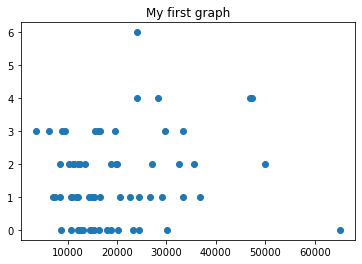

In [186]:
# plotting strip plot with seaborn
plt.scatter(data_fixtures_season['attendance'], data_fixtures_season['team_home_90min_goals'])
 
# giving labels to x-axis and y-axis
#ax.set(xlabel ='Points earned by home team', ylabel ='Points earned by away team')
 
# giving title to the plot
plt.title('My first graph')
 


In [161]:
# number of home wins in Ligue 1 - 2021/2022
number_homeWins = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['homeName'] == data_finished_fixtures_ligue1['finalResult']]
print(len(number_homeWins))

75


In [160]:
# number of away wins in Ligue 1 - 2021/2022
number_awayWins = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['awayName'] == data_finished_fixtures_ligue1['finalResult']]
print(len(number_awayWins))

55


In [167]:
# number of draws in Ligue 1 - 2021/2022
number_draws = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['finalResult'] == 'Draw']
print(len(number_draws))

57


In [187]:
data_finished_homefixtures_lille = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['homeName'] == 'Lille']
data_finished_homefixtures_lille

,id,seasonName,idHome,homeName,idAway,awayName,halftimeScore,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,pts_earned_homeName,pts_earned_awayName,attendance,date,status
11,228041,Ligue 1 - 2021/2022,930,Lille,933,Nice,0-3,0,4,0-4,Nice,0,3,30144.0,2021-08-14 15:00:00,finished
38,228068,Ligue 1 - 2021/2022,930,Lille,932,Montpellier,1-1,2,1,2-1,Lille,3,0,NaN,2021-08-29 15:00:00,finished
61,228092,Ligue 1 - 2021/2022,930,Lille,946,Reims,2-0,2,1,2-1,Lille,3,0,32604.0,2021-09-22 17:00:00,finished
88,228114,Ligue 1 - 2021/2022,930,Lille,934,Olympique Marseille,1-0,2,0,2-0,Lille,3,0,None,2021-10-03 15:05:00,finished
102,228138,Ligue 1 - 2021/2022,930,Lille,958,Brest,1-1,1,1,1-1,Draw,1,1,NaN,2021-10-23 19:00:00,finished
121,228153,Ligue 1 - 2021/2022,930,Lille,942,Angers,1-0,1,1,1-1,Draw,1,1,33305.0,2021-11-06 16:00:00,finished
141,228170,Ligue 1 - 2021/2022,930,Lille,931,Nantes,1-1,1,1,1-1,Draw,1,1,NaN,2021-11-27 16:00:00,finished
161,228196,Ligue 1 - 2021/2022,930,Lille,936,Troyes,0-1,2,1,2-1,Lille,3,0,NaN,2021-12-04 18:00:00,finished
173,228205,Ligue 1 - 2021/2022,930,Lille,939,Olympique Lyonnais,0-0,0,0,0-0,Draw,1,1,NaN,2021-12-12 12:00:00,finished


In [145]:
number_wins_homefixtures_Lille = data_finished_homefixtures_lille.finalResult.value_counts().Lille
number_wins_homefixtures_Lille

4

In [148]:
data_finished_awayfixtures_lille = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['awayName'] == 'Lille']
data_finished_awayfixtures_lille

,id,seasonName,idHome,homeName,idAway,awayName,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,date,status
8,228038,Ligue 1 - 2021/2022,1036,Metz,930,Lille,3,3,3-3,Draw,2021-08-08 15:00:00,finished
22,228052,Ligue 1 - 2021/2022,941,Saint-Étienne,930,Lille,1,1,1-1,Draw,2021-08-21 19:00:00,finished
40,228070,Ligue 1 - 2021/2022,947,Lorient,930,Lille,2,1,2-1,Lorient,2021-09-10 19:00:00,finished
51,228082,Ligue 1 - 2021/2022,999,Lens,930,Lille,1,0,1-0,Lens,2021-09-18 15:00:00,finished
71,228101,Ligue 1 - 2021/2022,1000,Strasbourg,930,Lille,1,2,1-2,Lille,2021-09-25 17:00:00,finished
91,228129,Ligue 1 - 2021/2022,959,Clermont,930,Lille,1,0,1-0,Clermont,2021-10-16 15:00:00,finished
110,228143,Ligue 1 - 2021/2022,948,PSG,930,Lille,2,1,2-1,PSG,2021-10-29 19:00:00,finished
130,228168,Ligue 1 - 2021/2022,940,Monaco,930,Lille,2,2,2-2,Draw,2021-11-19 20:00:00,finished
157,228184,Ligue 1 - 2021/2022,945,Rennes,930,Lille,1,2,1-2,Lille,2021-12-01 20:00:00,finished
187,228217,Ligue 1 - 2021/2022,937,Bordeaux,930,Lille,2,3,2-3,Lille,2021-12-22 20:00:00,finished


In [165]:
data_all_finished_fixtures_lille = pd.concat([data_finished_homefixtures_lille, data_finished_awayfixtures_lille], axis=0)
data_all_finished_fixtures_lille.sort_values(by=['date'])

,id,seasonName,idHome,homeName,idAway,awayName,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,date,status
8,228038,Ligue 1 - 2021/2022,1036,Metz,930,Lille,3,3,3-3,Draw,2021-08-08 15:00:00,finished
11,228041,Ligue 1 - 2021/2022,930,Lille,933,Nice,0,4,0-4,Nice,2021-08-14 15:00:00,finished
22,228052,Ligue 1 - 2021/2022,941,Saint-Étienne,930,Lille,1,1,1-1,Draw,2021-08-21 19:00:00,finished
38,228068,Ligue 1 - 2021/2022,930,Lille,932,Montpellier,2,1,2-1,Lille,2021-08-29 15:00:00,finished
40,228070,Ligue 1 - 2021/2022,947,Lorient,930,Lille,2,1,2-1,Lorient,2021-09-10 19:00:00,finished
51,228082,Ligue 1 - 2021/2022,999,Lens,930,Lille,1,0,1-0,Lens,2021-09-18 15:00:00,finished
61,228092,Ligue 1 - 2021/2022,930,Lille,946,Reims,2,1,2-1,Lille,2021-09-22 17:00:00,finished
71,228101,Ligue 1 - 2021/2022,1000,Strasbourg,930,Lille,1,2,1-2,Lille,2021-09-25 17:00:00,finished
88,228114,Ligue 1 - 2021/2022,930,Lille,934,Olympique Marseille,2,0,2-0,Lille,2021-10-03 15:05:00,finished
91,228129,Ligue 1 - 2021/2022,959,Clermont,930,Lille,1,0,1-0,Clermont,2021-10-16 15:00:00,finished


In [ ]:
plt.scatter

In [142]:
number_wins = data_all_finished_fixtures_lille.finalResult.value_counts().Lille
#percentage_wins = (number_wins / number_fixtures) * 100
number_draws = data_all_finished_fixtures_lille.finalResult.value_counts().Draw
#percentage_draws = (number_draws / number_fixtures) * 100
number_defeats = len(data_all_finished_fixtures_lille) - (number_wins + number_draws)
#percentage_defeats = (number_defeats / number_fixtures) * 100
number_fixtures = len(data_all_finished_fixtures_lille)
print(percentage_wins, percentage_draws, percentage_defeats)

36.84210526315789 36.84210526315789 26.31578947368421


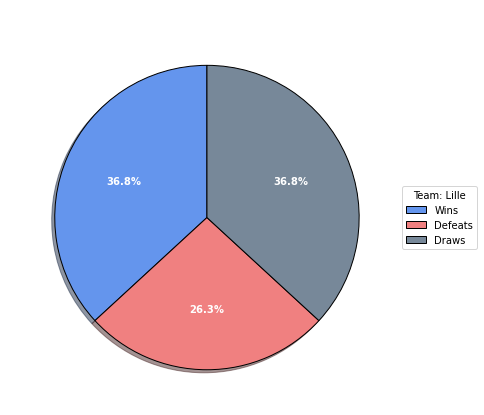

In [139]:
labels = ("Wins", "Defeats", "Draws")
data = [number_wins, number_defeats, number_draws]
#explode = (0.1, 0.1, 0.1)

# Creating color parameters
colors = ( "cornflowerblue", "lightcoral", "lightslategrey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Team: Lille",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
plt.title("Percentage of wins, defeats, draws", size = 20, color = 'white', weight = 'bold')
plt.show()

In [62]:
data_10_topscorers = data_topscorers.sort_values(by=['totalGoals'], ascending = False)[1:11]
data_10_topscorers

,idPlayer,playerName,totalGoals,penaltiesScored,penaltiesMissed,rank
1,15321,K. Mbappé,11,2,0,2
2,202,J. David,10,2,0,3
4,14938,W. Ben Yedder,9,5,0,4
5,19213,M. Terrier,9,0,0,4
6,19319,L. Ajorque,9,2,0,4
3,14533,G. Laborde,9,0,0,4
7,15313,L. Blas,8,2,0,8
8,26502,M. Bayo,8,1,0,8
9,19172,H. Diallo,7,0,0,10
10,19270,R. Kolo,7,0,0,10


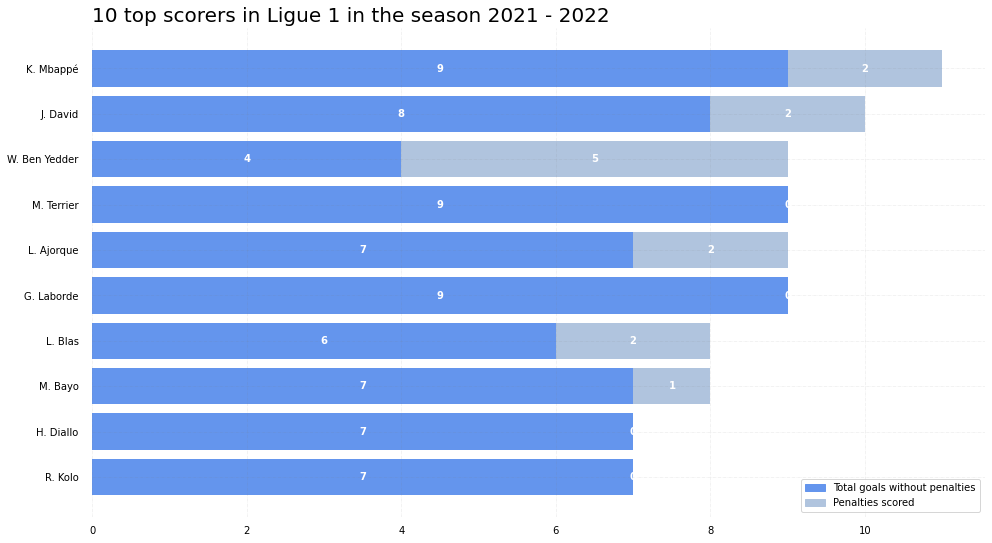

In [69]:
players = data_10_topscorers['playerName']
total_goals_without_penalties = data_10_topscorers['totalGoals'] - data_10_topscorers['penaltiesScored']
penalties_scored = data_10_topscorers['penaltiesScored']
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
b1 = ax.barh(players, total_goals_without_penalties, color = 'cornflowerblue')
b2 = ax.barh(players, penalties_scored, left = total_goals_without_penalties, color = 'lightsteelblue')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white', fontweight ='bold')
# Add Plot Title
ax.set_title('10 top scorers in Ligue 1 in the season 2021 - 2022', loc ='left', fontsize=20)

blue_patch = mpatches.Patch(color='cornflowerblue', label='Total goals without penalties')
orange_patch = mpatches.Patch(color='lightsteelblue', label='Penalties scored')
ax.legend(handles=[blue_patch, orange_patch])

plt.show()

In [143]:
data_topscorers['totalGoals'].unique()

NameError: name 'data_topscorers' is not defined

In [77]:
data_season[data_season['idLeague']==263]

,id,idLeague,leagueName,start,end
60,4242,263,Ligue 1 - 2021/2022,2021,2022


In [ ]:
data_season.columns

Index(['id', 'idLeague', 'leagueName', 'start', 'end'], dtype='object')

In [67]:
data_season[['idLeague','leagueName']]

,idLeague,leagueName
0,177,Copa do Nordeste - 2022
1,71,World Cup - 2022 Qatar
2,314,State Cup - 2021/2022
3,104,Armenian Cup - 2021/2022
4,493,Turkish Cup - 2021/2022
...,...,...
195,426,Super Cup - 2020/2021
196,425,Cup - 2020/2021
197,423,FNL - 2020/2021
198,338,FA Cup - 2020


In [ ]:
data_season['leagueName'].unique()

array(['Copa do Nordeste - 2022', 'World Cup - 2022 Qatar',
       'State Cup - 2021/2022', 'Armenian Cup - 2021/2022',
       'Turkish Cup - 2021/2022', 'Serie C - 2021/2022',
       'Copa Gaúcha - 2021', 'Super Cup - 2021/2022', 'Cupa - 2021/2022',
       'Kategoria e Parë - 2021/2022', 'UEFA Super Cup - 2021/2022',
       'Thai League 1 - 2021/2022', 'Copa Rio - 2021',
       'Kategoria Superiore - 2021/2022', 'Premyer Liqa - 2021/2022',
       'UEFA Europa League - 2021/2022', 'Copa Paulista - 2021',
       'Ukrainian Cup - 2021/2022', 'Super League - 2021/2022',
       'Serie B - 2021/2022',
       'South African Premier Division - 2021/2022',
       'Cupa României - 2021/2022', 'Cup - 2021/2022',
       'Liga Nacional - 2021/2022', 'Canadian Championship - 2021',
       'Premier League - 2021/2022', 'Pro League - 2021/2022',
       'Coppa Italia - 2021/2022', 'KNVB Beker - 2021/2022',
       '1. Division - 2021/2022', 'Serie A - 2021/2022',
       'TFF 1. Lig - 2021/2022', 'FA Cu